**INVERTED CNN - number of filters in each layer decreases ((L-1)th layer have more filters than Lth layer)**

# INITIALIZATION

In [1]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

import tensorboard
import matplotlib.pyplot as plt

import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
train_images = train_images / 255.0 #normalizing
print(train_images.shape)
print(train_labels.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


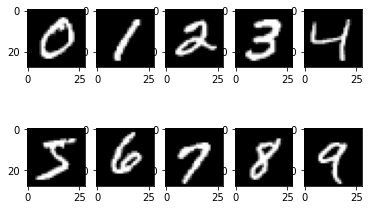

In [3]:
fig, ax = plt.subplots(2,5)
ax = ax.flatten()
for i in range(10):
    im_idx = np.argwhere(train_labels == i)[0]
    plottable_image = np.reshape(train_images[im_idx], (28, 28))
    ax[i].imshow(plottable_image, cmap='gray')

In [4]:
x_train = train_images.reshape(-1, 28, 28, 1) #add an additional dimension to represent the single-channel
x_test = test_images.reshape(-1, 28, 28, 1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


For testing different parameters in the model, I will run it through the parameters as below:
- Learning rate 0.0005, 0.001, 0.01, 0.05, 0.1
- Batch size from 2^6 to 2^10 (64, 128, 256, 512, 1024)
- Optimization: SGD, adam, RMSProp

I set 13 as the starting number of filter in the first convolutional layer, so I can reduce 1 more filter as the depth of the NN grows

# LEARNING RATE OPTIMIZATION
Set batch size = 256

In [6]:
learning_rate = [0.0005, 0.001, 0.01, 0.05, 0.1]

for b in range(8,9):
    for j in range(0,5):
        print('With 10 epochs, learning rate: ' + str(learning_rate[j])+ ', batch size:' + str(2**b))
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate[j])
        cnn_model = tf.keras.models.Sequential()
        for i in range(1,11):
            if i%2==0:
                cnn_model.add(tf.keras.layers.Conv2D(filters = 13-i, kernel_size = 3, strides=(1, 1), padding='same', activation='relu'))
                if i<9:
                    cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
            else:
                cnn_model.add(tf.keras.layers.Conv2D(filters = 13-i, kernel_size = 3, padding='same', activation='relu'))
        cnn_model.add(tf.keras.layers.Flatten())
        cnn_model.add(tf.keras.layers.Dense(256))
        cnn_model.add(tf.keras.layers.Activation('relu'))
        cnn_model.add(tf.keras.layers.Dense(10))
        cnn_model.add(tf.keras.layers.Activation('softmax'))

        cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, 
                          metrics=['accuracy'])
        cnn_model.build(input_shape=(1,28,28,1))
        cnn_model.summary()

        # Define the Keras TensorBoard callback.
        logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
        tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

        model1 = cnn_model
        # Train the model.
        model1.fit(
            x_train,
            train_labels, 
            batch_size=2**b,
            epochs=10, 
            callbacks=[tensorboard_callback])

        # Evaluate
        score = model1.evaluate(x_test, test_labels)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])

With 10 epochs, learning rate: 0.0005, batch size:256
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (1, 28, 28, 12)           120       
                                                                 
 conv2d_11 (Conv2D)          (1, 28, 28, 11)           1199      
                                                                 
 max_pooling2d_4 (MaxPooling  (1, 14, 14, 11)          0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (1, 14, 14, 10)           1000      
                                                                 
 conv2d_13 (Conv2D)          (1, 14, 14, 9)            819       
                                                                 
 max_pooling2d_5 (MaxPooling  (1, 7, 7, 9)             0         


# BATCH SIZE
Optimum learning rate 0.0005 will be used

In [9]:
learning_rate = [0.0005]

for b in range(6,11):
    for j in range(0,1):
        print('With 10 epochs, learning rate: ' + str(learning_rate[j])+ ', batch size:' + str(2**b))
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate[j])
        cnn_model = tf.keras.models.Sequential()
        for i in range(1,11):
            if i%2==0:
                cnn_model.add(tf.keras.layers.Conv2D(filters = 13-i, kernel_size = 3, strides=(1, 1), padding='same', activation='relu'))
                if i<9:
                    cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
            else:
                cnn_model.add(tf.keras.layers.Conv2D(filters = 13-i, kernel_size = 3, padding='same', activation='relu'))
        cnn_model.add(tf.keras.layers.Flatten())
        cnn_model.add(tf.keras.layers.Dense(256))
        cnn_model.add(tf.keras.layers.Activation('relu'))
        cnn_model.add(tf.keras.layers.Dense(10))
        cnn_model.add(tf.keras.layers.Activation('softmax'))

        cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, 
                          metrics=['accuracy'])
        cnn_model.build(input_shape=(1,28,28,1))
        cnn_model.summary()

        # Define the Keras TensorBoard callback.
        logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
        tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

        model2 = cnn_model
        # Train the model.
        model2.fit(
            x_train,
            train_labels, 
            batch_size=2**b,
            epochs=10, 
            callbacks=[tensorboard_callback])

        # Evaluate
        score = model2.evaluate(x_test, test_labels)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])

With 10 epochs, learning rate: 0.0005, batch size:64
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_120 (Conv2D)         (1, 28, 28, 12)           120       
                                                                 
 conv2d_121 (Conv2D)         (1, 28, 28, 11)           1199      
                                                                 
 max_pooling2d_48 (MaxPoolin  (1, 14, 14, 11)          0         
 g2D)                                                            
                                                                 
 conv2d_122 (Conv2D)         (1, 14, 14, 10)           1000      
                                                                 
 conv2d_123 (Conv2D)         (1, 14, 14, 9)            819       
                                                                 
 max_pooling2d_49 (MaxPoolin  (1, 7, 7, 9)             0         


# OPTIMIZER: SGD, RMSprop

Change opt = tf.keras.optimizers.Adam(learning_rate=learning_rate[j]) to:

opt = tf.keras.optimizers.SGD(learning_rate=learning_rate[j]) and

opt = tf.keras.optimizers.RMSProp(learning_rate=learning_rate[j])

In [11]:
learning_rate = [0.0005]

for b in range(6,7):
    for j in range(0,1):
        print('With 10 epochs, learning rate: ' + str(learning_rate[j])+ ', batch size:' + str(2**b))
        opt = tf.keras.optimizers.RMSprop(learning_rate=learning_rate[j])
        cnn_model = tf.keras.models.Sequential()
        for i in range(1,11):
            if i%2==0:
                cnn_model.add(tf.keras.layers.Conv2D(filters = 13-i, kernel_size = 3, strides=(1, 1), padding='same', activation='relu'))
                if i<9:
                    cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
            else:
                cnn_model.add(tf.keras.layers.Conv2D(filters = 13-i, kernel_size = 3, padding='same', activation='relu'))
        cnn_model.add(tf.keras.layers.Flatten())
        cnn_model.add(tf.keras.layers.Dense(256))
        cnn_model.add(tf.keras.layers.Activation('relu'))
        cnn_model.add(tf.keras.layers.Dense(10))
        cnn_model.add(tf.keras.layers.Activation('softmax'))

        cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, 
                          metrics=['accuracy'])
        cnn_model.build(input_shape=(1,28,28,1))
        cnn_model.summary()

        # Define the Keras TensorBoard callback.
        logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
        tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

        model3 = cnn_model
        # Train the model.
        model3.fit(
            x_train,
            train_labels, 
            batch_size=2**b,
            epochs=10, 
            callbacks=[tensorboard_callback])

        # Evaluate
        score = model3.evaluate(x_test, test_labels)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])

With 10 epochs, learning rate: 0.0005, batch size:64
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_180 (Conv2D)         (1, 28, 28, 12)           120       
                                                                 
 conv2d_181 (Conv2D)         (1, 28, 28, 11)           1199      
                                                                 
 max_pooling2d_72 (MaxPoolin  (1, 14, 14, 11)          0         
 g2D)                                                            
                                                                 
 conv2d_182 (Conv2D)         (1, 14, 14, 10)           1000      
                                                                 
 conv2d_183 (Conv2D)         (1, 14, 14, 9)            819       
                                                                 
 max_pooling2d_73 (MaxPoolin  (1, 7, 7, 9)             0         
